In [1]:
import os
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 128

In [2]:
base_dir = "data"

def filename(what: str) -> str:
    return os.path.join(base_dir, f"{what}.csv")

In [3]:
df_boxes = pd.read_csv(filename("boxes"))
df_answers = pd.read_csv(filename("answers"))

## Descriptive Statistics

In [4]:
# How many attributes question?
questions = df_answers.question.unique()
len(questions)

6

In [5]:
list(questions)

['statue/ mannequin',
 'reflection of a person',
 'human being',
 'on wheels',
 'on poster/picture/billboard',
 'on a bike']

In [6]:
# How many unique annotators?
df_answers.user_id.nunique()

94

In [7]:
# How many image objects?
df_answers.crop_id.nunique()

32711

In [8]:
# Overall number of answers
df_answers.answer.count()

1022156

In [9]:
# Overall number of answers provided per question
df_answers.groupby(by="question").answer.count()

question
human being                    179727
on a bike                      173339
on poster/picture/billboard    164239
on wheels                      172855
reflection of a person         164688
statue/ mannequin              167308
Name: answer, dtype: int64

In [10]:
# Distribution of number of repeats per task
(
    df_answers
    .groupby(by=["question", "crop_id"])
    .answer
    .count()
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "repeats", "answer": "count"})
    .sort_values(by="repeats")
)

,repeats,count
8,1,3
7,4,5
0,5,178229
1,6,10480
5,7,680
4,8,1493
3,9,2378
2,10,2976
6,11,22


In [11]:
# Number of solved tasks per worker
answers_per_rater = (
    df_answers
    .groupby(by="user_id")
    .answer
    .count()
    .to_frame()
    .rename(columns={
        "answer": "answers_per_rater"
    })
)

num = answers_per_rater.answers_per_rater.to_numpy()
thresholds = np.exp(np.linspace(0, math.log(5e4), num=20)).astype(int)
exceeds = (
    thresholds.reshape(-1, 1)
    <= num.reshape(1, -1)
)
num_exceeds = exceeds.sum(axis=-1)

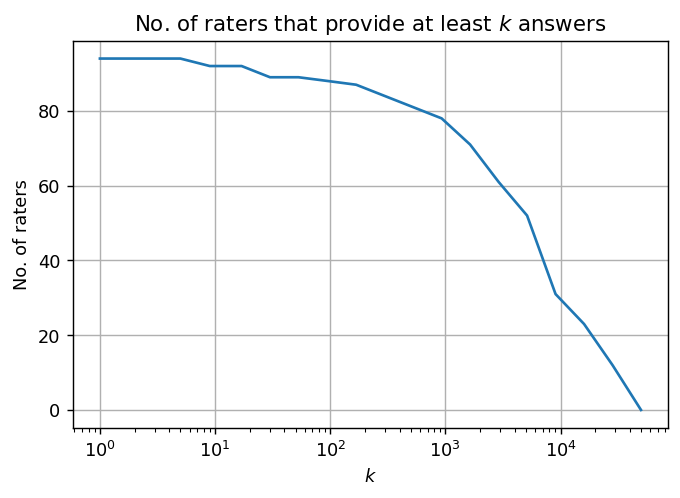

In [12]:
fig, ax = plt.subplots()
ax.plot(thresholds, num_exceeds)
ax.set_xscale("log")
ax.grid(True)

ax.set_xlabel("$k$")
ax.set_ylabel("No. of raters")

ax.set_title("No. of raters that provide at least $k$ answers")

fig.savefig("num_tasks_per_rater.png", bbox_inches="tight")

plt.show()

In [13]:
# Especially, the 10, 100, 1000, 10,000 benchmarks
thresholds = [10, 100, 1000, 10_000]
exceeds = (
    np.array(thresholds).reshape(-1, 1)
    <= num.reshape(1, -1)
)
num_exceeds = exceeds.sum(axis=-1)
dict(zip(thresholds, num_exceeds))

{10: 92, 100: 88, 1000: 77, 10000: 30}